In [2]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [3]:
#reading the dataset
data = pd.read_csv('D:\Projects\Market_Segmentation\data\Customer_Data.csv')
df = data.copy()

| Column Name                      | Description                                                                         |
|---------------------------------|-------------------------------------------------------------------------------------|
| CUST_ID                         | Customer ID or unique identifier for each customer.                                  |
| BALANCE                         | Current balance amount on the credit card.                                           |
| BALANCE_FREQUENCY               | Frequency of balance updates, score between 0 and 1.                                  |
| PURCHASES                       | Total amount of purchases made.                                                      |
| ONEOFF_PURCHASES                | Total amount of one-off purchases.                                                   |
| INSTALLMENTS_PURCHASES          | Total amount of installment purchases.                                               |
| CASH_ADVANCE                    | Total cash advance taken.                                                            |
| PURCHASES_FREQUENCY             | How frequently purchases are being made, score between 0 and 1.                       |
| ONEOFF_PURCHASES_FREQUENCY      | Frequency of one-off purchases, score between 0 and 1.                                |
| PURCHASES_INSTALLMENTS_FREQUENCY | Frequency of installment purchases, score between 0 and 1.                           |
| CASH_ADVANCE_FREQUENCY         | Frequency of cash advances, score between 0 and 1.                                    |
| CASH_ADVANCE_TRX               | Number of transactions for cash advances.                                            |
| PURCHASES_TRX                  | Number of purchase transactions made.                                                |
| CREDIT_LIMIT                   | Credit limit for the customer.                                                        |
| PAYMENTS                       | Total amount of payments done by the customer.                                        |
| MINIMUM_PAYMENTS               | Minimum amount due as payment.                                                        |
| PRC_FULL_PAYMENT               | Percentage of full payment made by the customer.                                      |
| TENURE                         | Number of months as a customer.                                                       |


In [4]:
#Data overview
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
#Shape of the dataset
df.shape

(8950, 18)

In [6]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
#null values present in the data
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* There is 1 null value present in a column Credit limit, we can drop it.
* We can impute the mean in  column minimum_payments.

In [8]:
#imputing mean value
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [9]:
#dropping the null values present in the data
df.dropna(inplace=True)

In [10]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

In [11]:
#description of the data
np.transpose(df.describe())

count         mean          std        min  \
BALANCE                           8949.0  1564.647593  2081.584016   0.000000   
BALANCE_FREQUENCY                 8949.0     0.877350     0.236798   0.000000   
PURCHASES                         8949.0  1003.316936  2136.727848   0.000000   
ONEOFF_PURCHASES                  8949.0   592.503572  1659.968851   0.000000   
INSTALLMENTS_PURCHASES            8949.0   411.113579   904.378205   0.000000   
CASH_ADVANCE                      8949.0   978.959616  2097.264344   0.000000   
PURCHASES_FREQUENCY               8949.0     0.490405     0.401360   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8949.0     0.202480     0.298345   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8949.0     0.364478     0.397451   0.000000   
CASH_ADVANCE_FREQUENCY            8949.0     0.135141     0.200132   0.000000   
CASH_ADVANCE_TRX                  8949.0     3.249078     6.824987   0.000000   
PURCHASES_TRX                     8949.0    14.711476    24.858552   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8949.0  1733.336511  2895.168146   0.000000   
MINIMUM_PAYMENTS                  8949.0   864.301501  2330.700932   0.019163   
PRC_FULL_PAYMENT                  8949.0     0.153732     0.292511   0.000000   
TENURE                            8949.0    11.517935     1.337134   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.365782   873.680279  2054.372848   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.800000   361.490000  1110.170000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.830000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.650000   
CASH_ADVANCE                         0.000000     0.000000  1113.868654   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.282850   857.062706  1901.279320   
MINIMUM_PAYMENTS                   170.875613   335.657631   864.206542   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

* For most of the columns, the standard deviation is greater than mean.


In [12]:
#dropping the custid column
df.drop(columns=['CUST_ID'],axis=1,inplace=True)

In [13]:
#columns 
columns = df.columns
print(columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [14]:
len(columns)

17

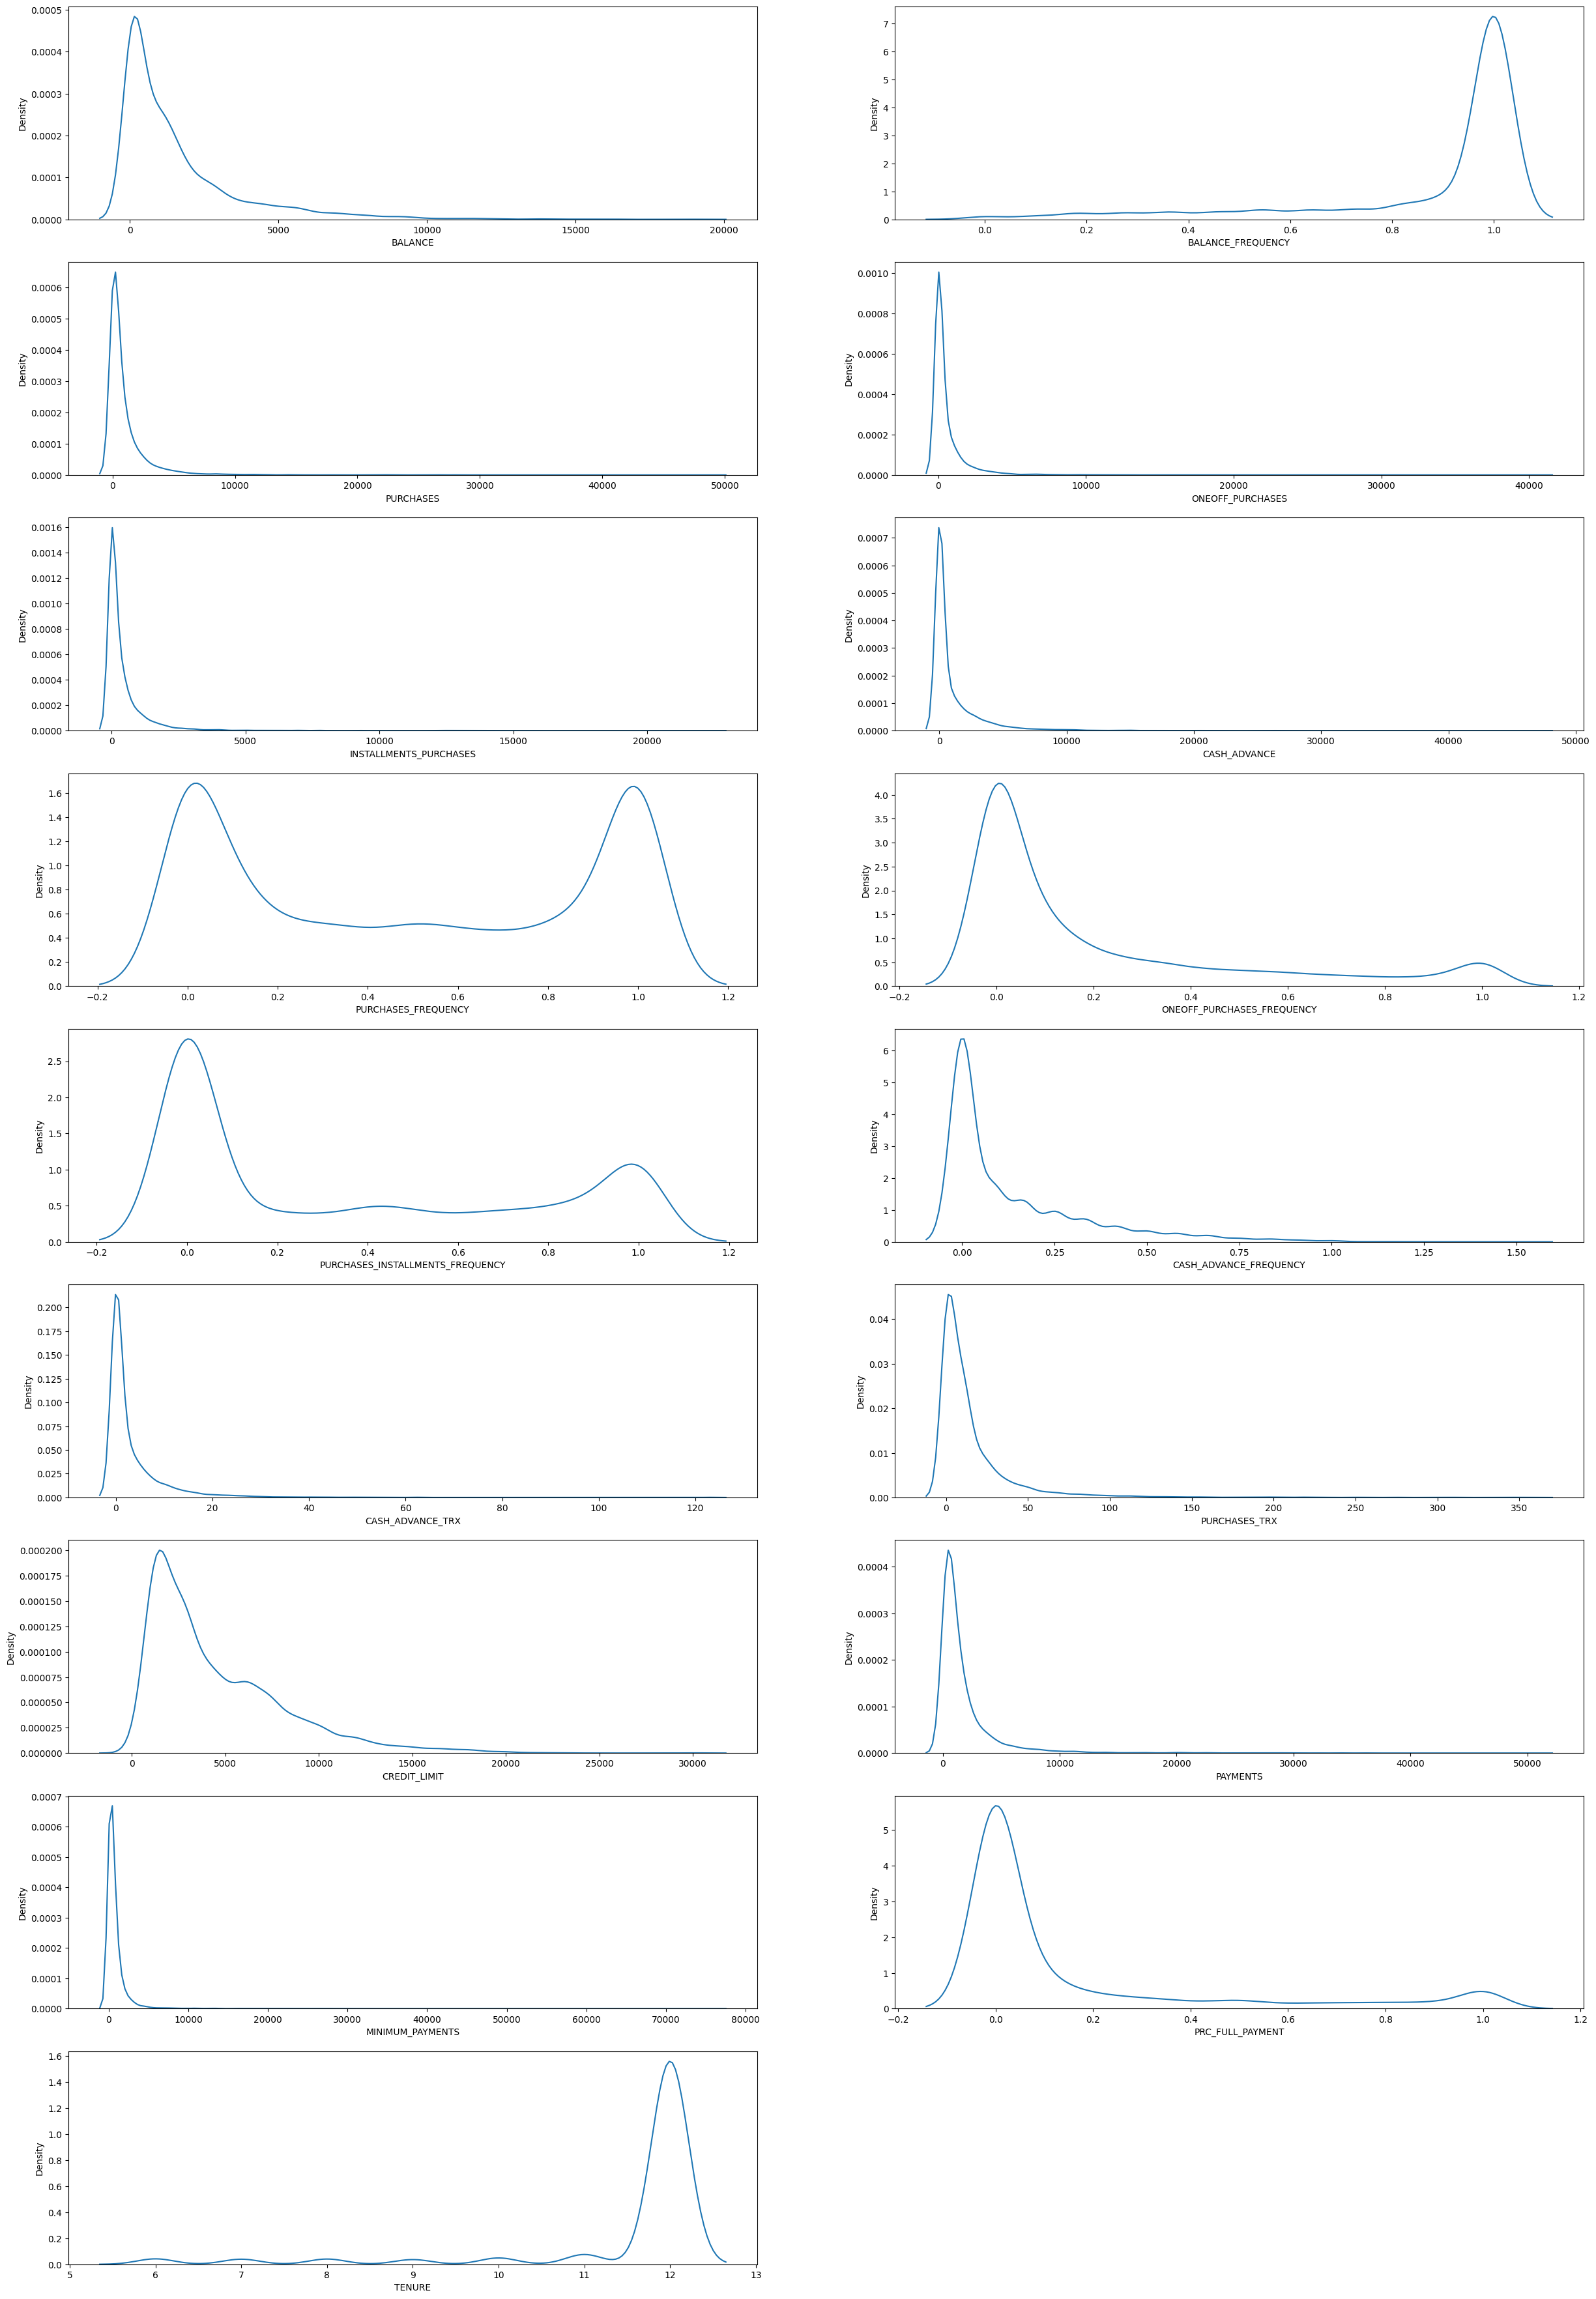

In [15]:
#plotting the features
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

* Most of the features are right skewed.
* Most of the data has tenure of 12 months.

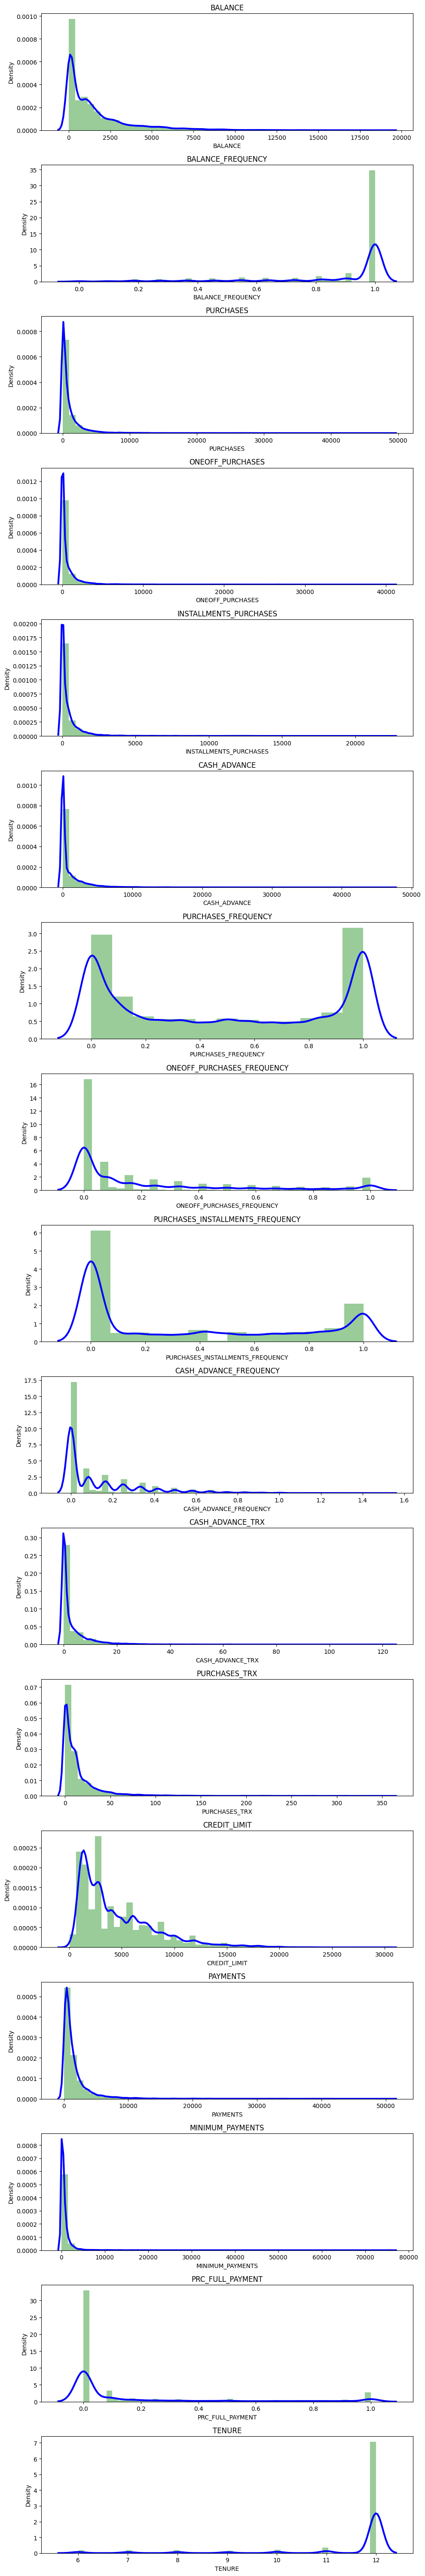

In [16]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

In [17]:
#different tenure counts
df['TENURE'].value_counts()

TENURE
12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: count, dtype: int64

In [18]:
#different tenure counts in percentage
print(round(df['TENURE'].value_counts() / df.shape[0] * 100,2))

TENURE
12    84.75
11     4.08
10     2.64
6      2.27
8      2.19
7      2.12
9      1.96
Name: count, dtype: float64


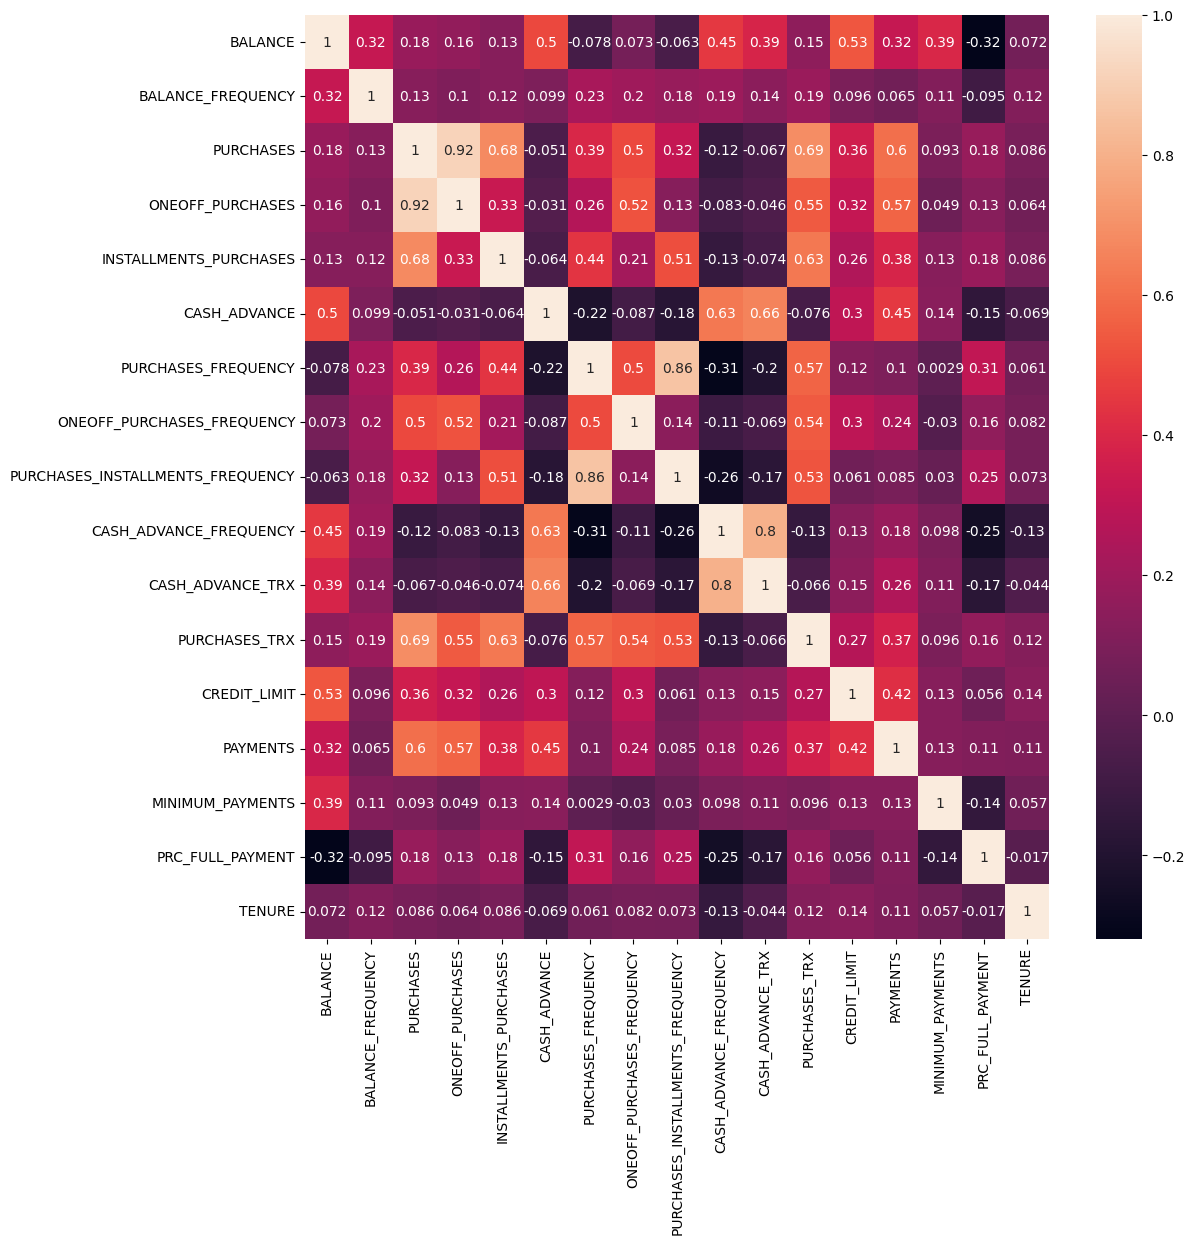

In [19]:
#plotting histogram
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot =True)
plt.show()

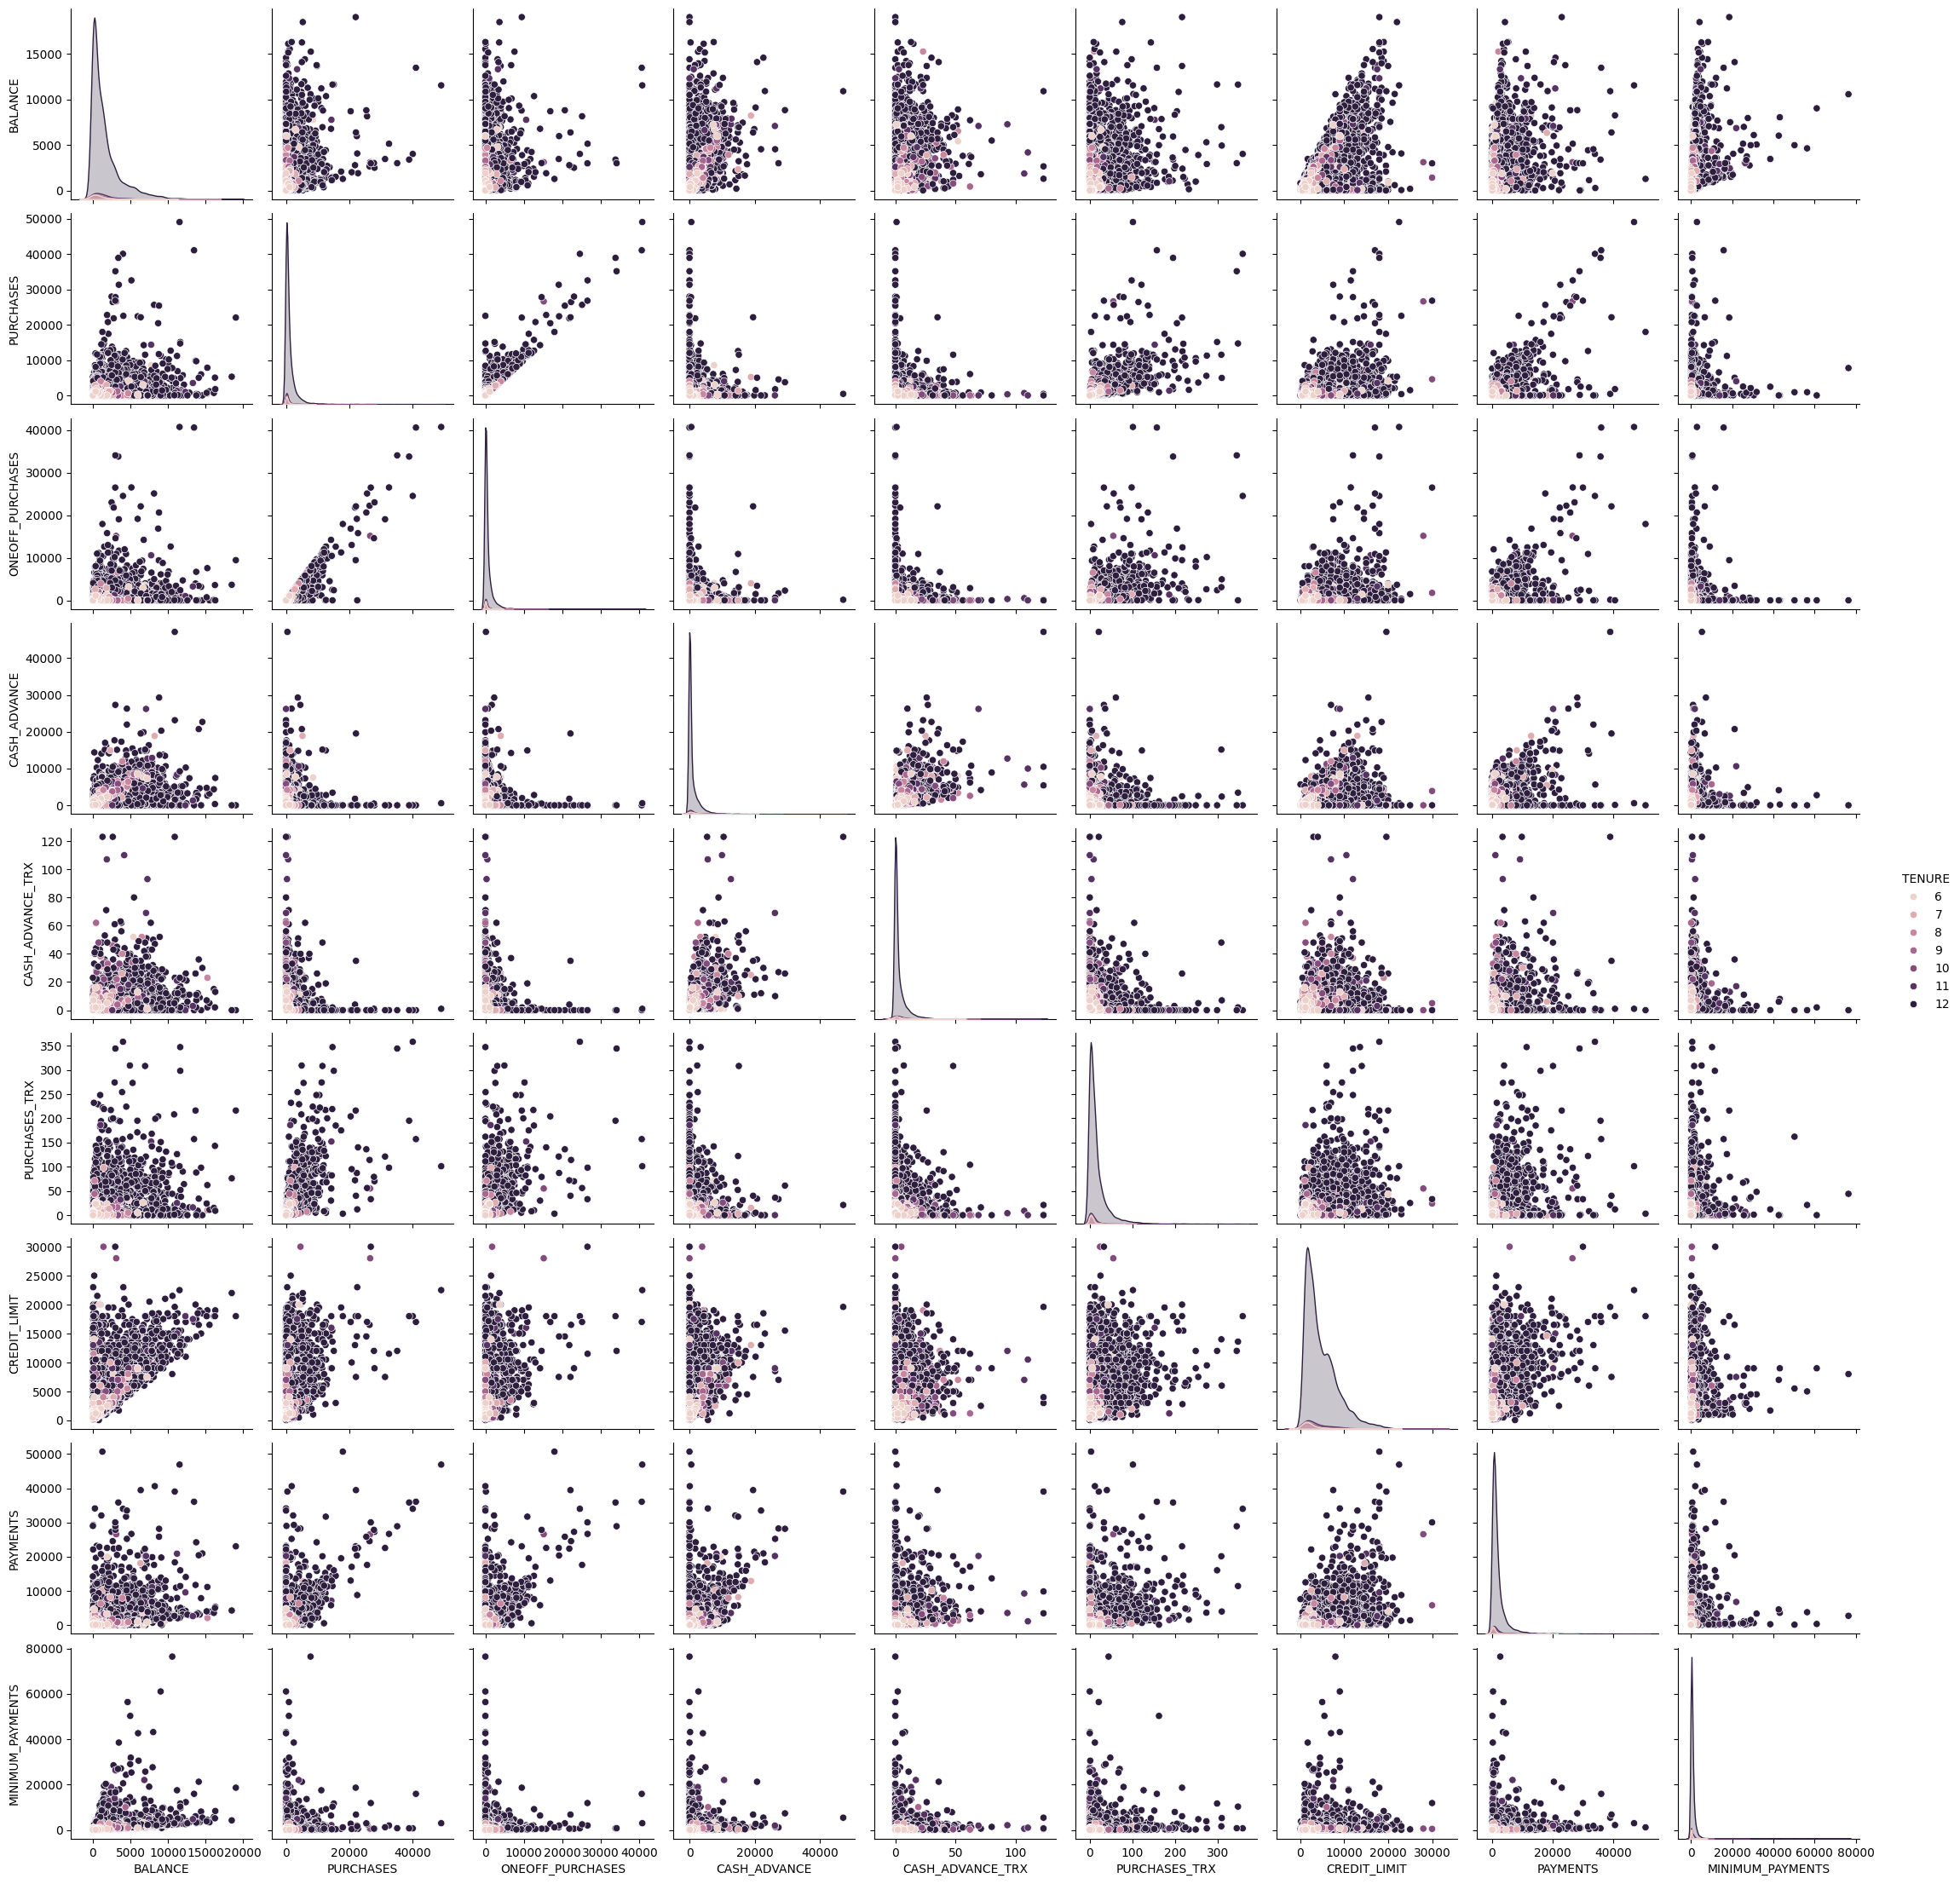

In [20]:
#pair plot of the features
sns.pairplot(
        df,
        x_vars=['BALANCE','PURCHASES','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX',
                'PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'],
        y_vars=['BALANCE','PURCHASES','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX',
                'PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'],
        hue= 'TENURE',)

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 7584 and the vector passed to `y` has length 9.

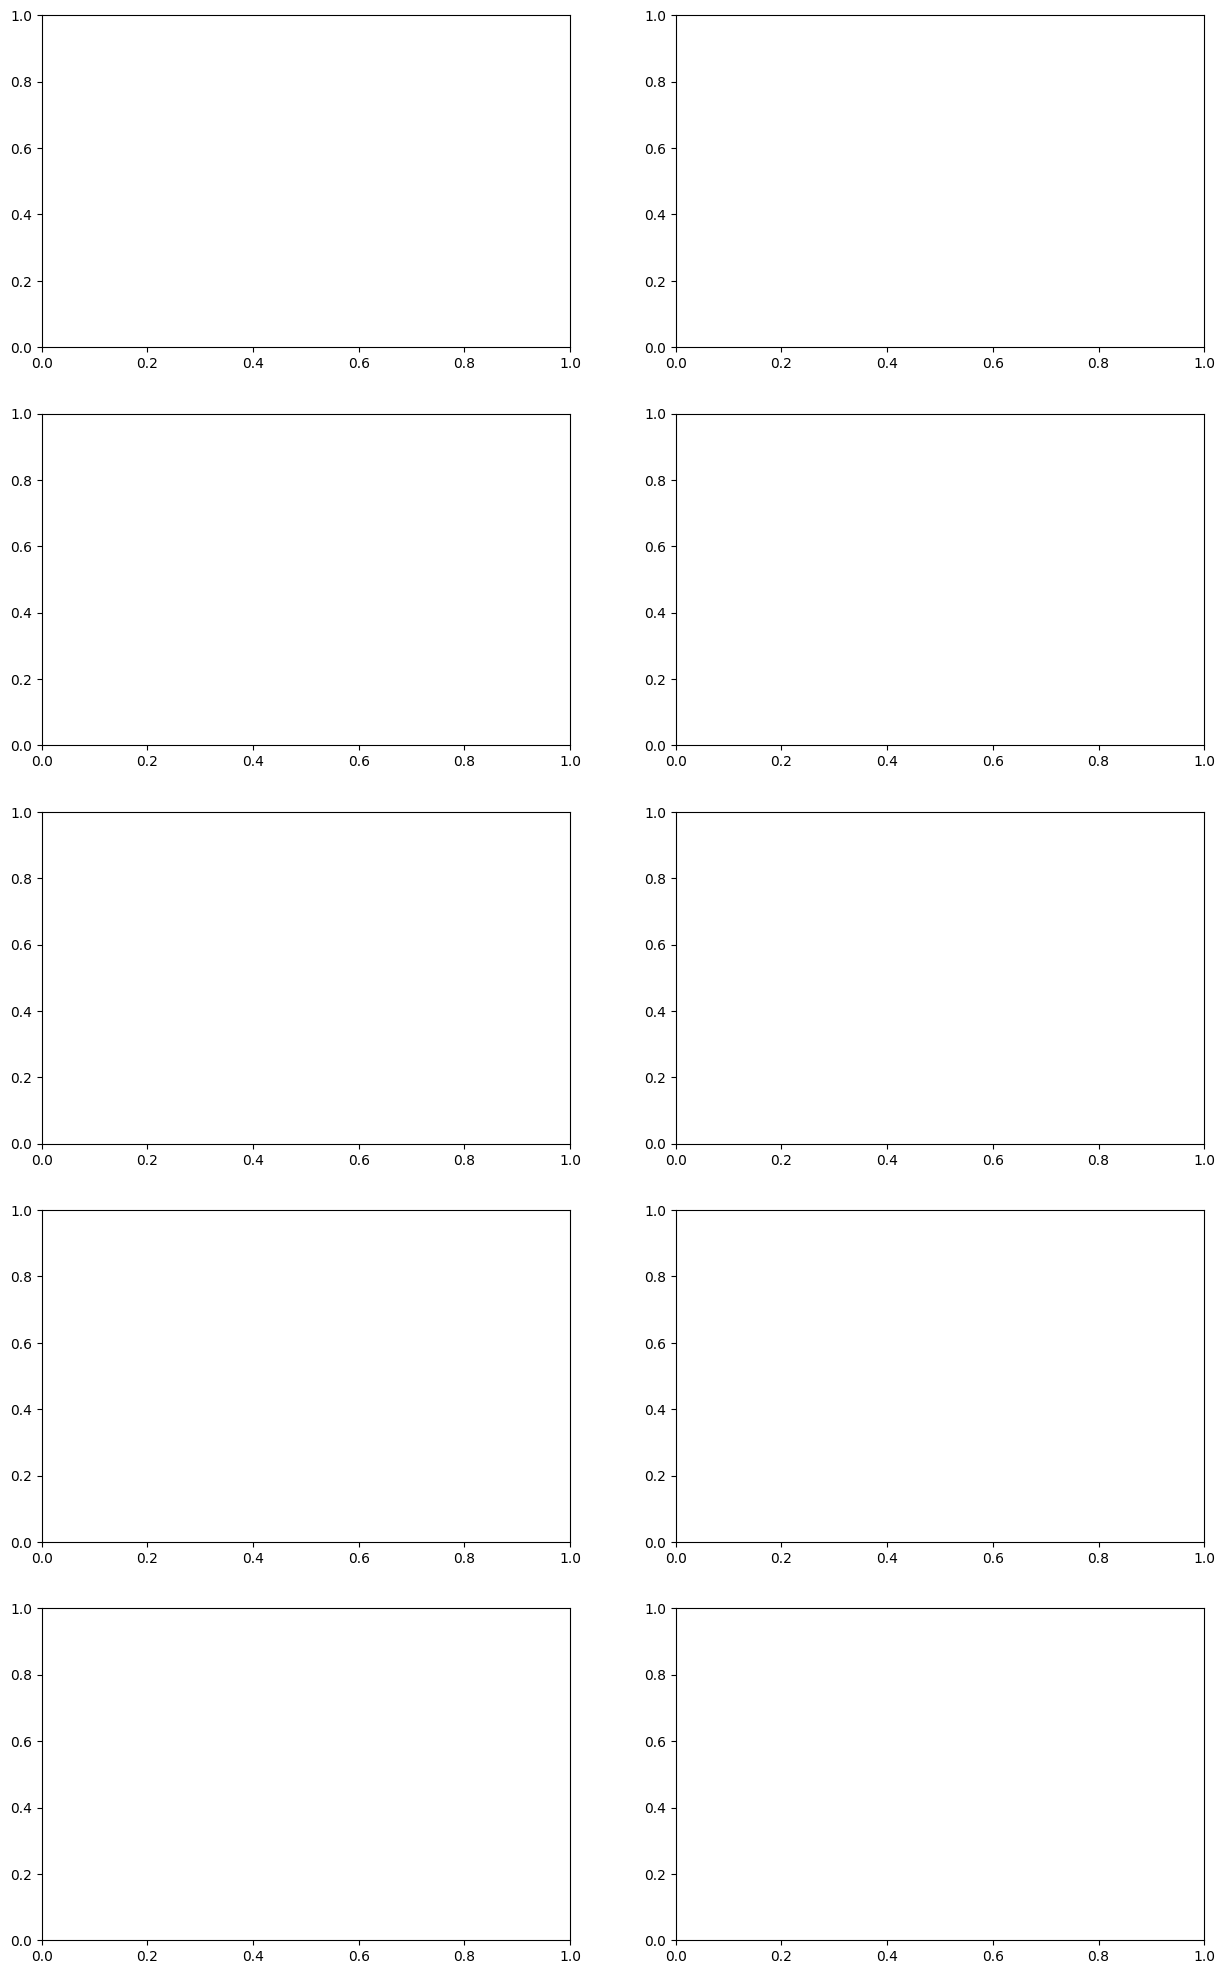

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX',
            'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# Set up subplots
num_features = len(features)
num_rows = num_features // 2 + num_features % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

# Iterate through each feature
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    for tenure_value in df['TENURE'].unique():
        sns.scatterplot(data=df[df['TENURE'] == tenure_value], x=feature, y=features, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. Other Features')
    axes[row, col].legend(title='TENURE')

# Adjust layout
plt.tight_layout()
plt.show()



#### Modelling

In [78]:
#scaling the dataframe
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [79]:
#performing dimesionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data= principal_components, columns = ['PCA1','PCA2'])
pca_df


PCA1      PCA2
0    -1.682361 -1.076716
1    -1.138970  2.506121
2     0.969385 -0.383451
3    -0.873815  0.042939
4    -1.599682 -0.688770
...        ...       ...
8944 -0.359268 -2.015735
8945 -0.564023 -1.638731
8946 -0.925786 -1.810488
8947 -2.336214 -0.657793
8948 -0.556042 -0.400169

[8949 rows x 2 columns]

In [91]:
#explained varaince
pca.explained_variance_

array([4.63944058, 3.45183888])

In [95]:
pca.explained_variance_ratio_

array([0.27287777, 0.20302666])

In [94]:
#components
pca.components_

array([[ 0.10100204,  0.11990299,  0.41167027,  0.3464312 ,  0.33683423,
        -0.02341373,  0.32149699,  0.2946375 ,  0.27471067, -0.08918257,
        -0.04872412,  0.39071584,  0.21166607,  0.26622782,  0.06031364,
         0.1321167 ,  0.08082742],
       [ 0.40396918,  0.13057965,  0.04111178,  0.06293756, -0.01847931,
         0.43922327, -0.1907648 , -0.01787935, -0.1785831 ,  0.43406532,
         0.41971003, -0.01933126,  0.23871274,  0.25751358,  0.16697062,
        -0.19001691, -0.00443121]])

##### Hyperparameter tuning

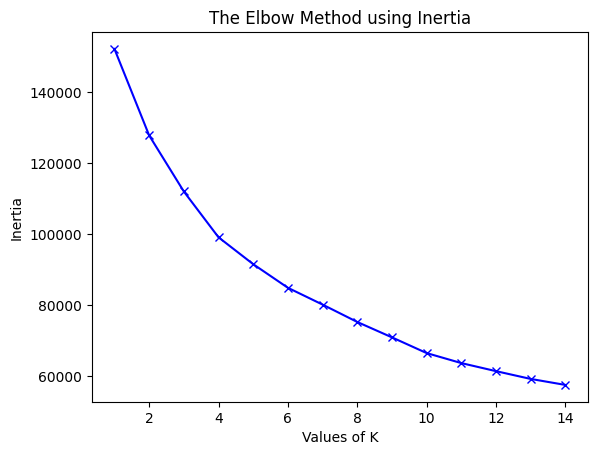

In [80]:
#Finding 'k' value by elbow method
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

* The value of 4 is optimal for K-means clustering

In [81]:
#Model building using KMeans

kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

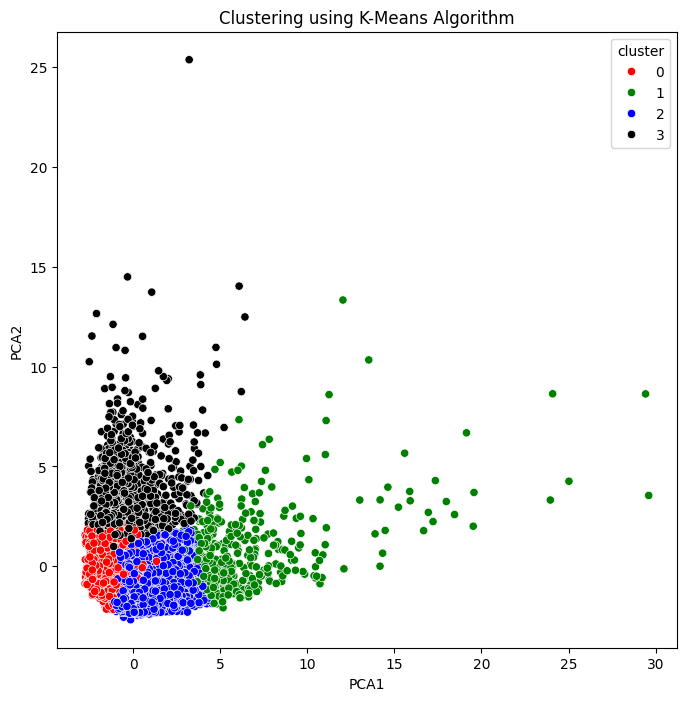

In [82]:
#visualizing the clustered dataframe
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [83]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  1017.040725          0.790550   269.935898       209.838869   
1  3568.229573          0.987070  7763.389601      5154.847307   
2   899.299380          0.934870  1242.072303       597.737724   
3  4621.396904          0.968488   504.475312       321.767462   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              60.363247   600.723316            0.170235   
1            2610.038554   651.886567            0.945557   
2             644.608225   212.826705            0.885601   
3             182.793575  4540.928501            0.288831   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.086267                         0.080670   
1                   0.740475                         0.785910   
2                   0.298060                         0.712440   
3                   0.139442                         0.186409   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.115571         2.144684      2.905968  3279.125710   
1               0.070011         2.074813     89.683292  9725.685786   
2               0.042806         0.795199     22.217546  4223.894562   
3               0.485645        14.340641      7.705734  7582.002146   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   976.632616       587.889613         0.077885  11.447091  
1  7369.283900      1991.564193         0.291319  11.950125  
2  1337.731087       651.671318         0.268767  11.595436  
3  3497.664445      2017.516099         0.034995  11.389545

In [84]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   
5203          NaN                NaN        NaN               NaN   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       95.4      0.000000             0.166667   
1                        0.0   6442.945483             0.000000   
2                        0.0      0.000000             1.000000   
3                        0.0    205.788017             0.083333   
4                        0.0      0.000000             0.083333   
...                      ...           ...                  ...   
8946                   300.0      0.000000             1.000000   
8947                   144.4      0.000000             0.833333   
8948                     0.0     36.558778             0.000000   
8949                     0.0    127.040008             0.666667   
5203                     NaN           NaN                  NaN   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   
5203                         NaN                               NaN   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   
5203                     NaN               NaN            NaN           NaN   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000    12.0      0.0  
1     4103.032597       1072.340217          0.222222    12.0      3.0  
2      622.066742        627.284787          0.000000    12.0      2.0  
3        0.000000        864.206542          0.000000    12.0      0.0  
4      678.334763        244.791237          0.000000    12.0      0.0  
...           ...               ...               ...     ...      ...  
8946   275.861322        864.206542          0.000000     6.0      2.0  
89

In [85]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
8     1014.926473           1.000000     861.49            661.49   
9      152.225975           0.545455    1281.60           1281.60   
...           ...                ...        ...               ...   
8942    40.829749           1.000000     113.28              0.00   
8943     5.871712           0.500000      20.90             20.90   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
5203          NaN                NaN        NaN               NaN   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
8                     200.00      0.000000             0.333333   
9                       0.00      0.000000             0.166667   
...                      ...           ...                  ...   
8942                  113.28      0.000000             1.000000   
8943                    0.00      0.000000             0.166667   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
5203                     NaN           NaN                  NaN   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
8                       0.083333                          0.250000   
9                       0.166667                          0.000000   
...                          ...                               ...   
8942                    0.000000                          0.833333   
8943                    0.166667                          0.000000   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
5203                         NaN                               NaN   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
8                   0.000000               0.0            5.0        7000.0   
9                   0.000000               0.0            3.0       11000.0   
...                      ...               ...            ...           ...   
8942                0.000000               0.0            6.0        1000.0   
8943                0.000000               0.0            1.0         500.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
5203                     NaN               NaN            NaN           NaN   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787              0.00    12.0      0.0  
3        0.000000        864.206542              0.00    12.0      0.0  
4      678.334763        244.791237              0.00    12.0      0.0  
8      688.278568        311.963409              0.00    12.0      0.0  
9     1164.770591        100.302262              0.00    12.0      0.0  
...           ...               ...               ...     ...      ...  
8942    94.488828         86.283101              0.25     6.0      0.0  
89

In [86]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6      627.260806           1.000000    7091.01           6402.63   
21    6369.531318           1.000000    6359.95           5910.04   
57    2386.330629           1.000000    5217.62           4789.09   
84    1935.362486           1.000000    4915.60           4515.34   
90    9381.255094           1.000000    5100.07           1147.83   
...           ...                ...        ...               ...   
8214    61.211620           0.909091     280.83              0.00   
8540   482.407545           0.636364       0.00              0.00   
8661   327.508171           0.875000    2477.68           1419.31   
8688  2898.484109           1.000000       0.00              0.00   
8736   851.249818           1.000000    2000.00           2000.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6                     688.38      0.000000             1.000000   
21                    449.91    229.028245             1.000000   
57                    428.53      0.000000             0.916667   
84                    400.26    293.844792             1.000000   
90                   3952.24    370.737197             1.000000   
...                      ...           ...                  ...   
8214                  280.83      0.000000             0.909091   
8540                    0.00   1071.188192             0.000000   
8661                 1058.37      0.000000             0.875000   
8688                    0.00   3021.097135             0.000000   
8736                    0.00   4085.845895             0.285714   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                       1.000000                          1.000000   
21                      0.916667                          1.000000   
57                      0.916667                          0.500000   
84                      1.000000                          0.333333   
90                      0.250000                          0.916667   
...                          ...                               ...   
8214                    0.000000                          0.909091   
8540                    0.000000                          0.000000   
8661                    0.875000                          0.750000   
8688                    0.000000                          0.000000   
8736                    0.285714                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                   0.000000               0.0           64.0       13500.0   
21                  0.333333               6.0           92.0       11250.0   
57                  0.000000               0.0           42.0        7500.0   
84                  0.083333               1.0           50.0        9000.0   
90                  0.083333               1.0           46.0        9000.0   
...                      ...               ...            ...           ...   
8214                0.000000               0.0           11.0        1500.0   
8540                0.166667               3.0            0.0        1400.0   
8661                0.000000               0.0           42.0        2000.0   
8688                0.272727               5.0            0.0        3000.0   
8736                0.571429              12.0            4.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
6     6354.314328        198.065894          1.000000    12.0      1.0  
21    2077.959051       1659.775075          0.000000    12.0      1.0  
57    5678.729613       1311.514878          0.083333    12.0      1.0  
84    4921.066897        594.756686          0.000000    12.0      1.0  
90    6409.496345       9827.045323          0.000000    12.0      1.0  
...           ...               ...               ...     ...      ...  
8214   191.386573        159.727823          0.000000    11.0      1.0  
85

In [87]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2     2495.148862           1.000000     773.17            773.17   
5     1809.828751           1.000000    1333.28              0.00   
7     1823.652743           1.000000     436.20              0.00   
10    1293.124939           1.000000     920.12              0.00   
12    1516.928620           1.000000    3217.99           2500.23   
...           ...                ...        ...               ...   
8939   728.352548           1.000000     734.40            734.40   
8941  5967.475270           0.833333     214.55              0.00   
8944   193.571722           0.833333    1012.73           1012.73   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                       0.00      0.000000             1.000000   
5                    1333.28      0.000000             0.666667   
7                     436.20      0.000000             1.000000   
10                    920.12      0.000000             1.000000   
12                    717.76      0.000000             1.000000   
...                      ...           ...                  ...   
8939                    0.00    239.891038             0.333333   
8941                  214.55   8555.409326             0.833333   
8944                    0.00      0.000000             0.333333   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       1.000000                          0.000000   
5                       0.000000                          0.583333   
7                       0.000000                          1.000000   
10                      0.000000                          1.000000   
12                      0.250000                          0.916667   
...                          ...                               ...   
8939                    0.333333                          0.000000   
8941                    0.000000                          0.666667   
8944                    0.333333                          0.000000   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000               0.0           12.0        7500.0   
5                   0.000000               0.0            8.0        1800.0   
7                   0.000000               0.0           12.0        2300.0   
10                  0.000000               0.0           12.0        1200.0   
12                  0.000000               0.0           26.0        3000.0   
...                      ...               ...            ...           ...   
8939                0.166667               2.0            2.0        1000.0   
8941                0.666667              13.0            5.0        9000.0   
8944                0.000000               0.0            2.0        4000.0   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
2      622.066742        627.284787              0.00    12.0      2.0  
5     1400.057770       2407.246035              0.00    12.0      2.0  
7      679.065082        532.033990              0.00    12.0      2.0  
10    1083.301007       2172.697765              0.00    12.0      2.0  
12     608.263689        490.207013              0.25    12.0      2.0  
...           ...               ...               ...     ...      ...  
8939    72.530037        110.950798              0.00     6.0      2.0  
89

In [88]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     3202.467416           0.909091       0.00              0.00   
15    6886.213231           1.000000    1611.70              0.00   
23    3800.151377           0.818182    4248.35           3454.56   
24    5368.571219           1.000000       0.00              0.00   
28    7152.864372           1.000000     387.05            204.55   
...           ...                ...        ...               ...   
8856   227.220411           1.000000    1387.60            288.54   
8857  2330.222764           1.000000    1320.00              0.00   
8868   380.839064           0.857143       0.00              0.00   
8914   181.891981           0.500000       0.00              0.00   
8940   130.838554           1.000000     591.24              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00   6442.945483             0.000000   
15                   1611.70   2301.491267             0.500000   
23                    793.79   7974.415626             1.000000   
24                      0.00    798.949863             0.000000   
28                    182.50   2236.145259             0.666667   
...                      ...           ...                  ...   
8856                 1099.06    107.660394             1.000000   
8857                 1320.00  14926.790590             0.428571   
8868                    0.00    703.941544             0.000000   
8914                    0.00   1865.191764             0.000000   
8940                  591.24      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.000000                          0.000000   
15                      0.000000                          0.500000   
23                      0.083333                          0.916667   
24                      0.000000                          0.000000   
28                      0.166667                          0.416667   
...                          ...                               ...   
8856                    0.875000                          0.875000   
8857                    0.000000                          0.285714   
8868                    0.000000                          0.000000   
8914                    0.000000                          0.000000   
8940                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.250000               4.0            0.0        7000.0   
15                  0.166667               4.0           11.0        8000.0   
23                  0.333333              13.0           13.0        9000.0   
24                  0.363636               4.0            0.0        6000.0   
28                  0.833333              16.0            8.0       10500.0   
...                      ...               ...            ...           ...   
8856                0.125000               1.0           71.0        1000.0   
8857                0.571429              10.0            3.0       10000.0   
8868                0.428571              13.0            0.0         500.0   
8914                0.500000              10.0            0.0        2000.0   
8940                0.000000               0.0            6.0        1000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
1     4103.032597       1072.340217          0.222222    12.0      3.0  
15    1993.439277       2109.906490          0.000000    12.0      3.0  
23    9479.043842       1425.426525          0.000000    12.0      3.0  
24    1422.726707       1657.002877          0.000000    11.0      3.0  
28    1601.448347       1648.851345          0.000000    12.0      3.0  
...           ...               ...               ...     ...      ...  
8856  1217.473837        136.283049          0.142857     8.0      3.0  
88

<Axes: xlabel='Cluster', ylabel='count'>

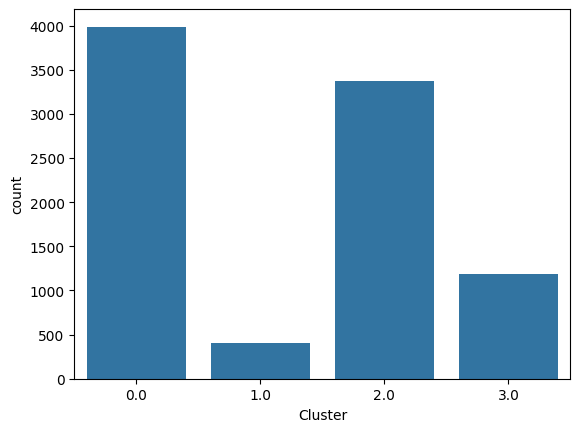

In [89]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

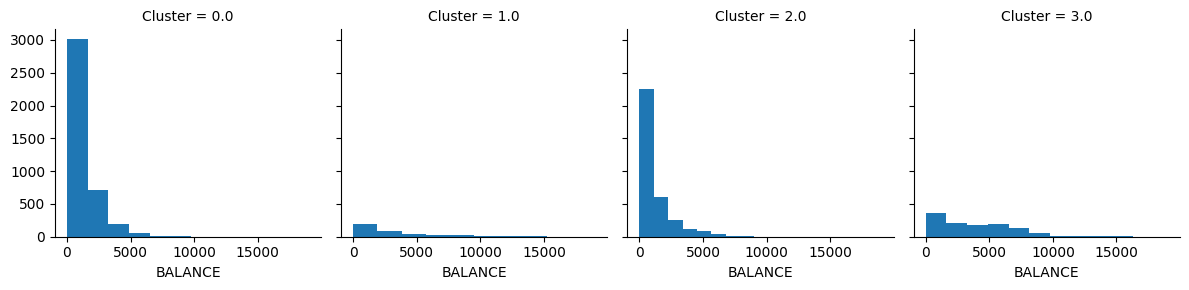

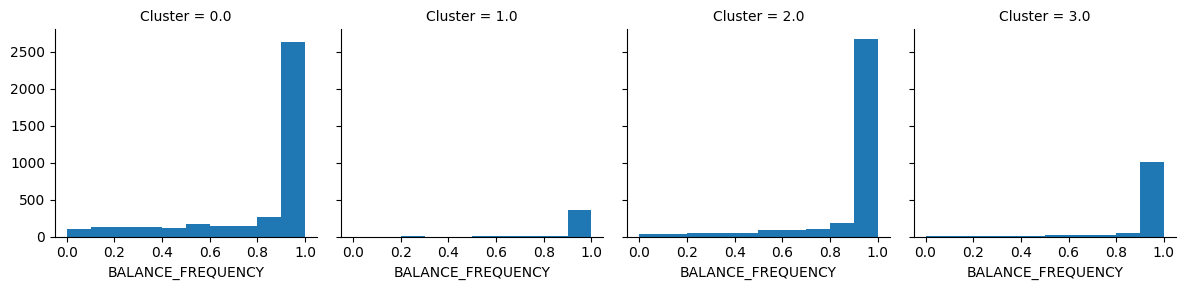

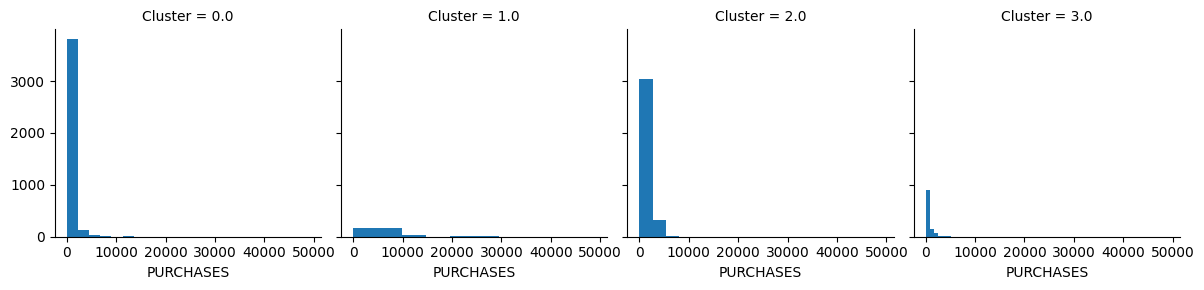

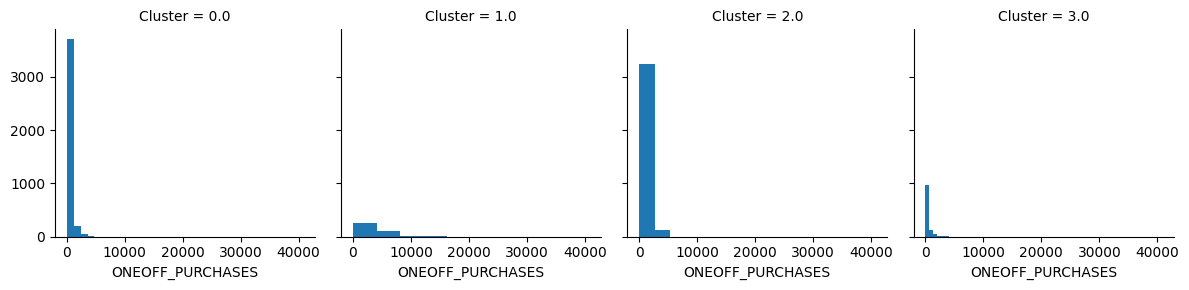

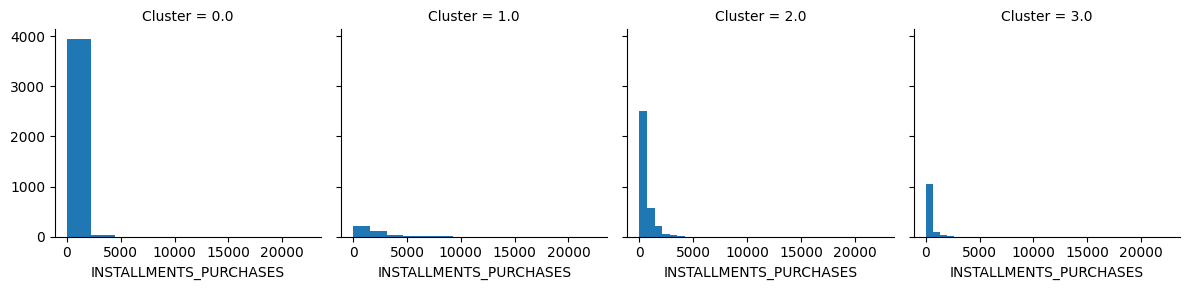

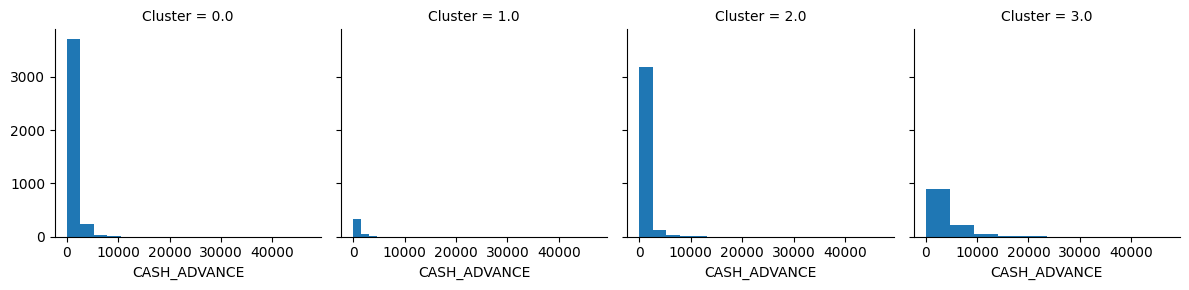

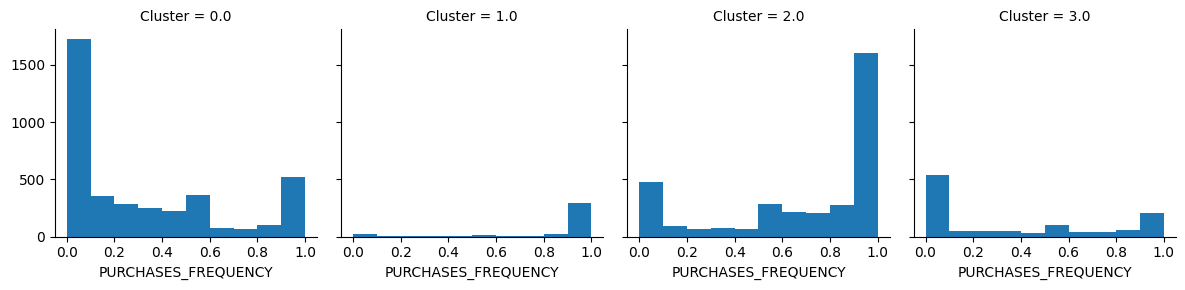

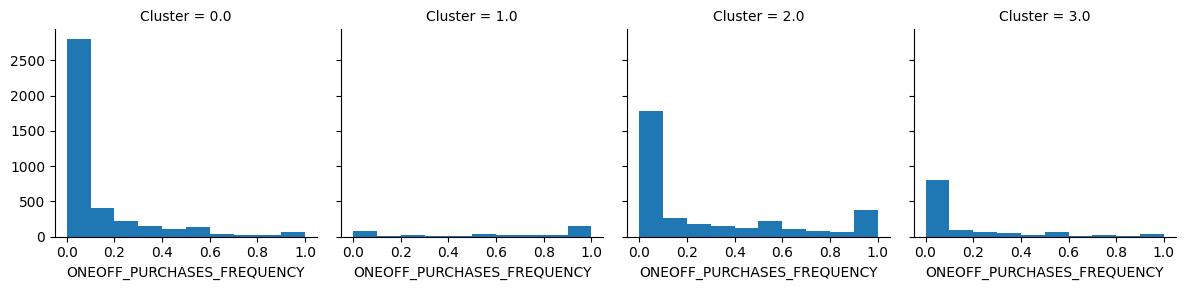

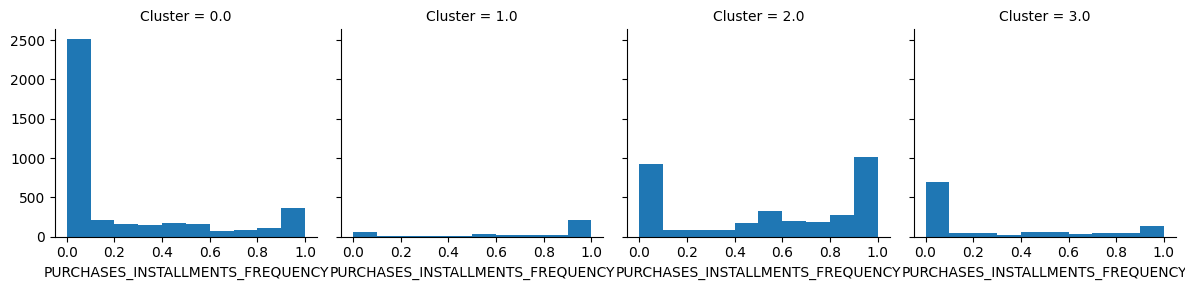

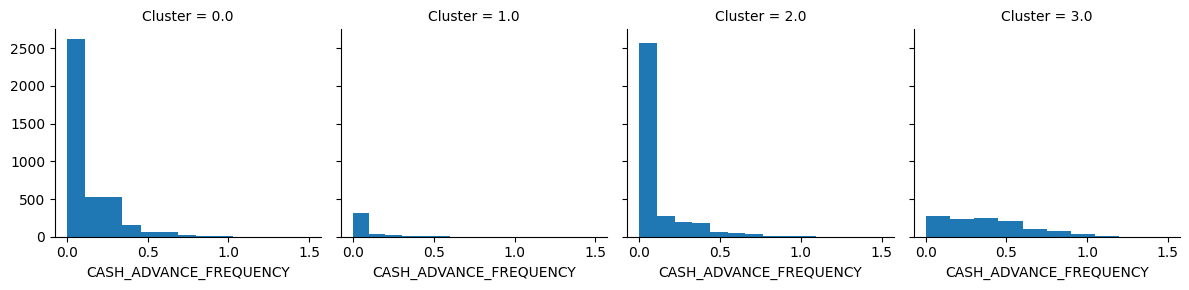

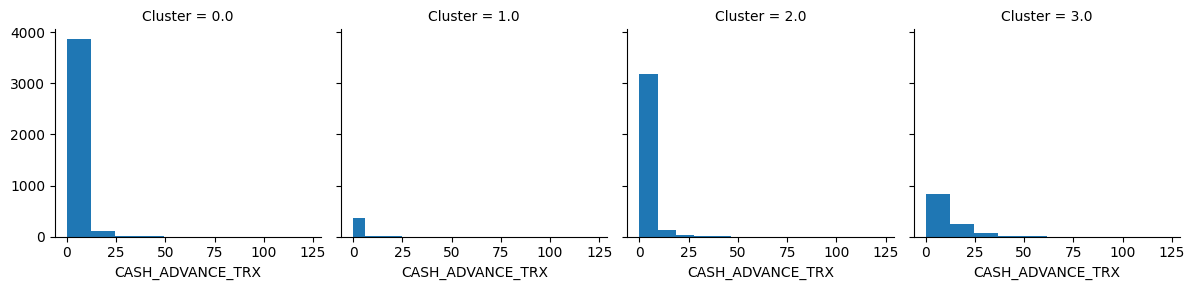

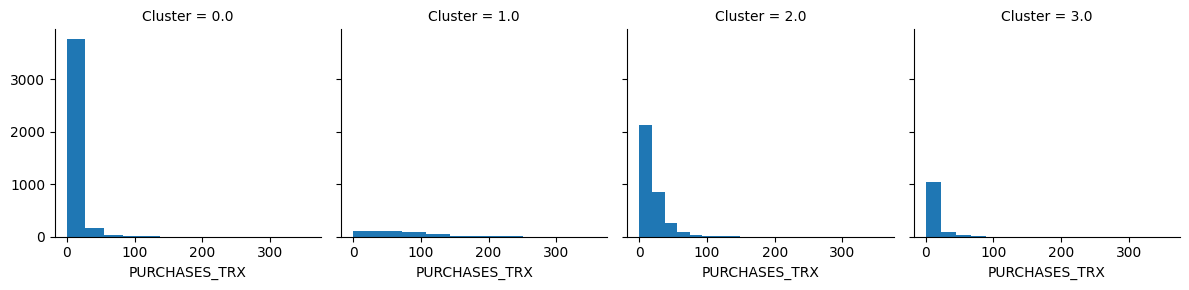

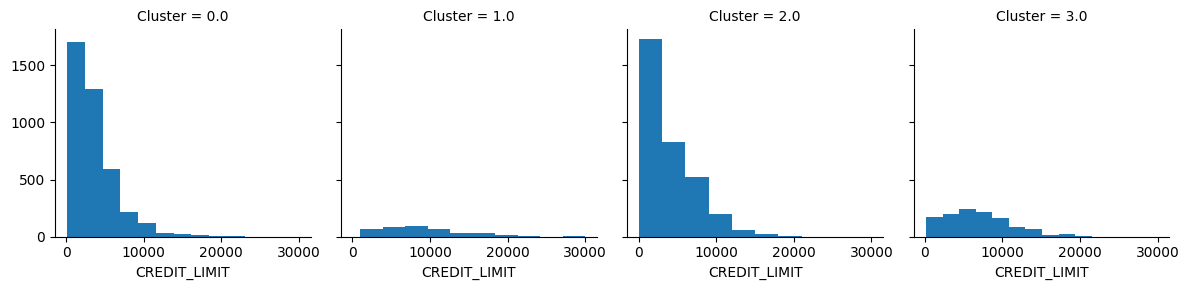

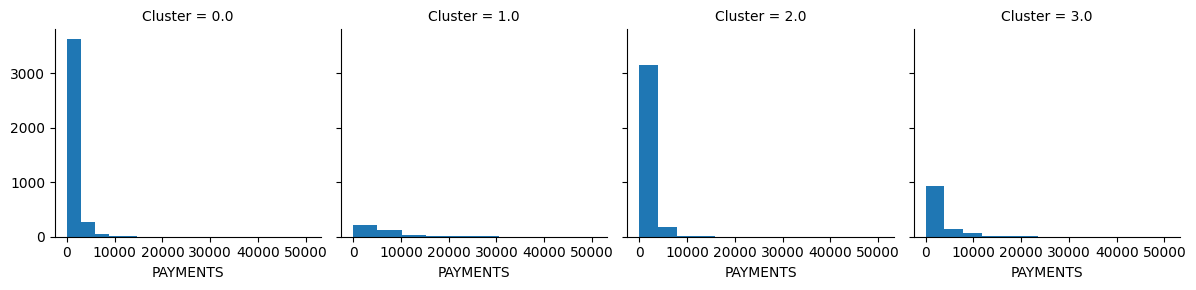

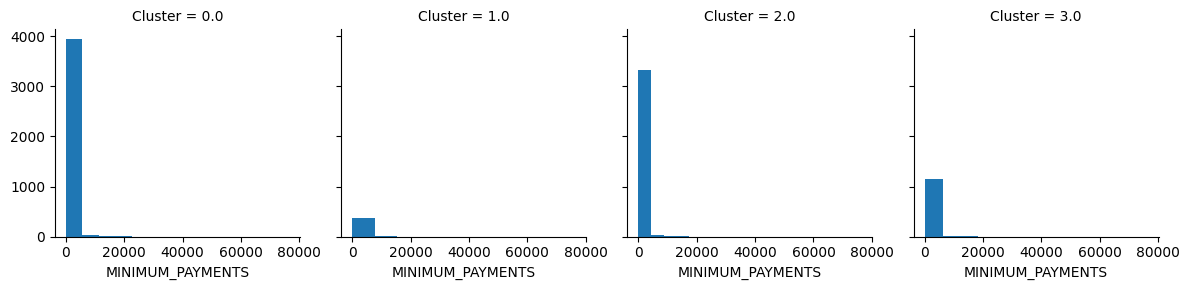

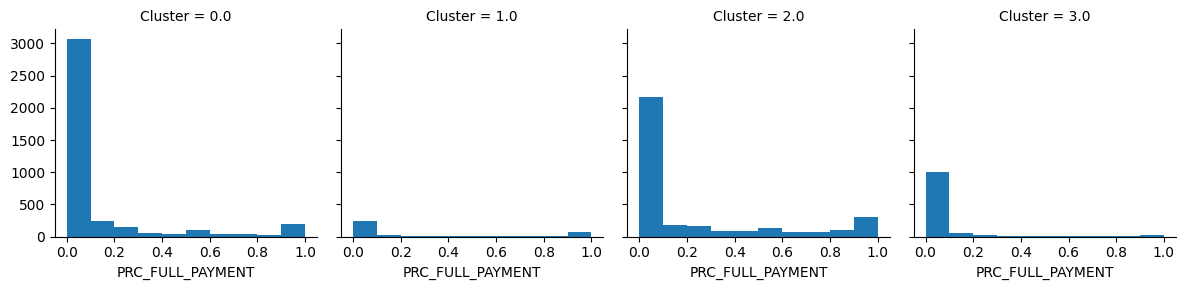

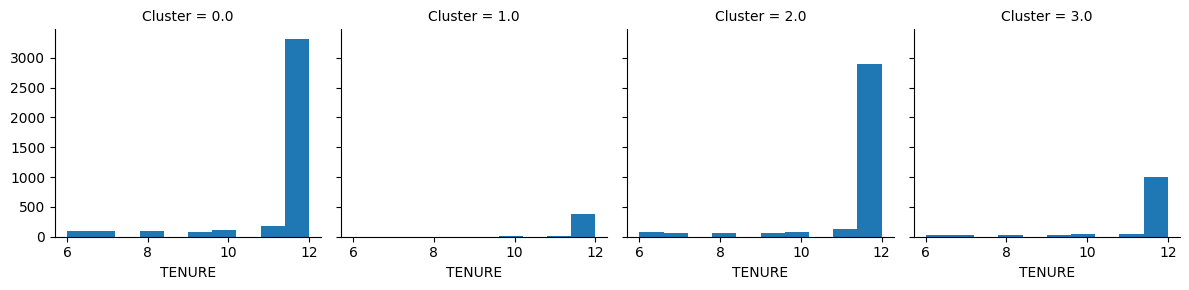

In [90]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()